# **STATISTICS FOR DATA SCIENCE ASSIGNMENT -1**

### **Objective**:  _Cleaning, analysing, visualising, forecasting and presentation of data_

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data_w_genres.csv')

data.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.00000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Weird Al"" Yankovic",0.176934,0.664788,218165.25760,0.685136,0.000046,0.162139,-9.877909,0.082392,132.495091,0.754409,33.681818,9,1,132,"['antiviral pop', 'comedy rock', 'comic', 'par..."
2,$IMEON,0.242300,0.806667,66307.33333,0.469000,0.000001,0.204333,-12.168000,0.482667,106.020000,0.592000,62.666667,6,0,6,[]
3,$NOT,0.547000,0.750125,152929.50000,0.519750,0.043137,0.213975,-8.878500,0.276725,114.229125,0.319500,64.625000,6,1,8,"['east coast hip hop', 'gangster rap', 'hardco..."
4,$pyda,0.000122,0.514000,331240.00000,0.899000,0.079300,0.367000,-5.115000,0.060200,174.028000,0.266000,58.000000,7,1,1,[]


In [3]:
len(data)
# Approx 22k songs data

22727

# Description of the columns


* **acousticness** - confidence measure whether a track is acoustic or not
* **danciblity**- Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm        stability, beat strength, and overall regularity- dependant on tempo,loudness,energy,key,mode
* **duration_ms** - duration of the song in miliseconds 
* **energy** -represents a perceptual measure of intensity and activity 
* **liveness**-Detects the presence of an audience in the recording 
* **instrumentalness** -Predicts whether a track contains no vocals 
* **loudness** -Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks 
* **speechiness** -	Speechiness detects the presence of spoken words in a track
* **tempo** -The overall estimated tempo of a track in beats per minute 
* **valance** -describes the musical positiveness conveyed by a track.
* **poularity** -the recent popularity of the song in the USA
* **key**-The estimated overall key of the track. Integers map to pitches using standard-independant
* **mode** -tells weather a song is in the major/minor scale
* **count** -The number of tracks from the original dataset, produced by the given artist (non necessay for any analysis)
*  **genre** -the genre of the song depends on all the above factors


## Data Visualisation

### 1) Histograms

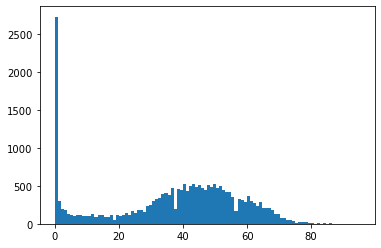

In [4]:
#plotting histogram for popularity
y = data['popularity']
freq, bin_edge, plot = plt.hist(y, bins = 100)

#### We can immediately see that popularity seems to be almost normally distributed but there is a spike at 0 which might be due to data not being available. Hence these rows should be dropped when analysing 

In [5]:
len(data[data['popularity']==0])

2387

In [6]:
data.drop(data[data['popularity']==0].index, inplace=True)

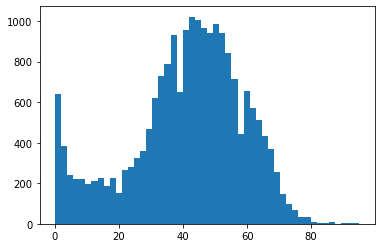

In [7]:
y = data['popularity']
freq, bin_edge, plot = plt.hist(y, bins = 50)

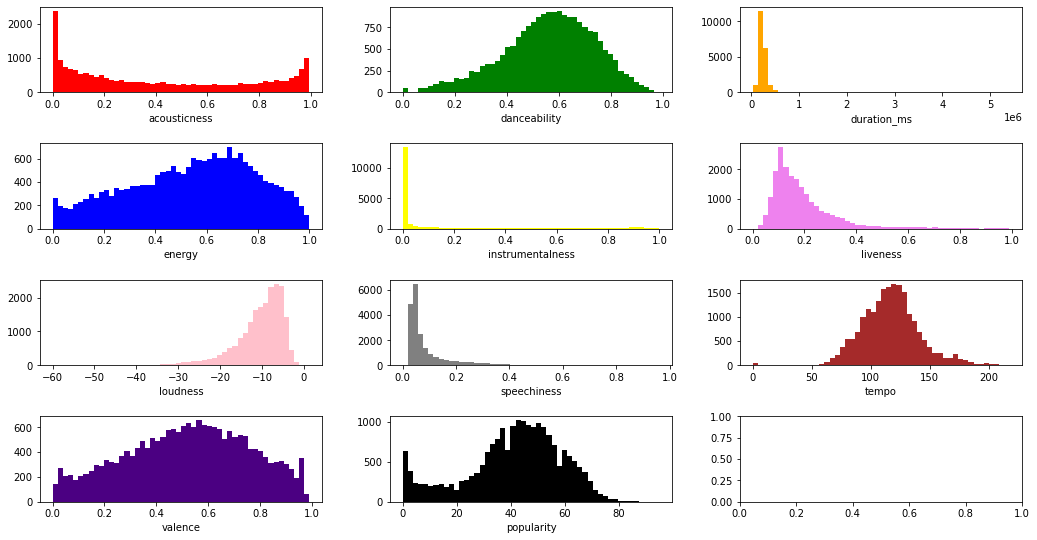

In [8]:
# similarly plotting the distribution of all continuous variables
fig, axs = plt.subplots(4, 3, figsize=(15, 8))
fig.tight_layout(pad=3.0)
axs = axs.reshape(12,)
i = 0
colors = ['red', 'green', 'orange', 'blue','yellow','violet','pink','grey','brown','indigo','black']
for feature in data.columns:
    subplot = axs[i]
    if(data[feature].dtype=='float64'):
        subplot.set(xlabel=feature)
        f, edge, plot = subplot.hist(data[feature], 50, color=colors[i])
        i = i+1;

#### We can observe that danceability, liveness, loudness, tempo, valence and popularity follow at least some type of distribution
#### There are potential outliers in duration, instrumentalness, tempo and speechiness

In [9]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,20340.000000,20340.000000,2.034000e+04,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000,20340.000000
mean,0.414848,0.560873,2.402499e+05,0.540173,0.144506,0.196689,-10.504063,0.091382,117.213290,0.520880,41.160601,5.417650,0.761799,15.853589
std,0.343911,0.175195,1.135769e+05,0.247024,0.276150,0.136134,5.741161,0.101664,24.587394,0.238933,17.804319,3.510466,0.425993,55.003083
min,0.000000,0.000000,2.786700e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.003802,0.000000,0.000000,1.000000
25%,0.090570,0.453000,1.867222e+05,0.357991,0.000002,0.109692,-13.045478,0.038800,101.329625,0.347464,32.000000,2.000000,1.000000,2.000000
50%,0.329183,0.574000,2.245380e+05,0.568000,0.000767,0.158082,-9.197000,0.052084,116.719390,0.532800,43.250000,6.000000,1.000000,4.000000
75%,0.747082,0.687000,2.697475e+05,0.731513,0.111065,0.236535,-6.400950,0.096245,130.550000,0.704000,53.666667,8.000000,1.000000,10.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.961651,217.743000,0.991000,95.000000,11.000000,1.000000,3172.000000


Instrumentalness is heavily skewed towards 0 and provides no valuable data.
Duration of songs is between 2 and 3 x 10^5 seconds which is about 3 to 5 minutes. Clearly some outliers are present as song durations of 50 minutes is not a likely value. Hence we choose to drop these outliers.
<br>
**We have picked 10 minutes to be the threshold value for songs we will be considering in our project**

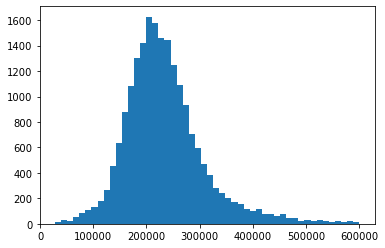

In [10]:
DUR_MAX = 6e+05
outliers = data[data['duration_ms'] > DUR_MAX].index
data.drop(outliers, inplace=True)
f, edge, plot = plt.hist(data['duration_ms'],50)

#### This shows a more normally distributed, slightly skewed data we can use for further analysis

In [11]:
# Dropping the instrumentalness column
data.drop('instrumentalness', axis=1, inplace=True)

### 2) Using Box Plots to detect the outliers

In [12]:
data['speechiness'].describe()

count    20161.000000
mean         0.090885
std          0.099322
min          0.000000
25%          0.038800
50%          0.052106
75%          0.096315
max          0.960000
Name: speechiness, dtype: float64

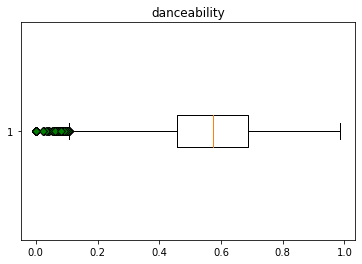

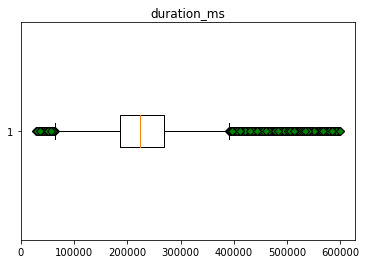

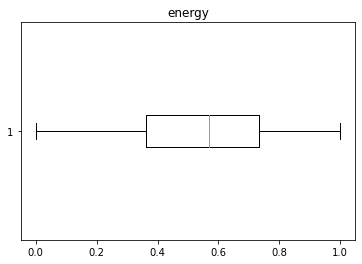

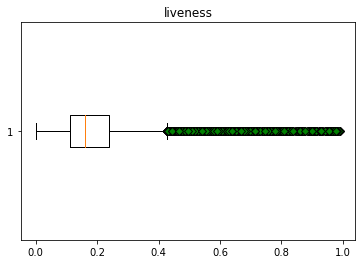

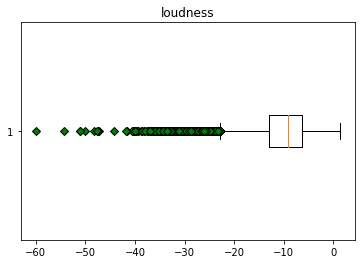

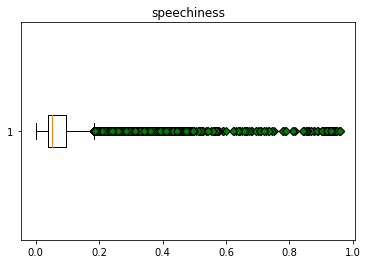

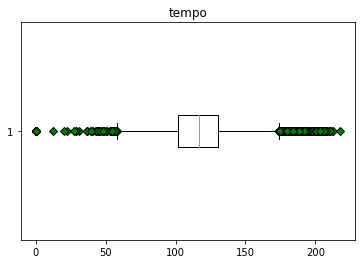

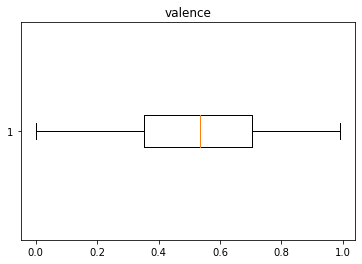

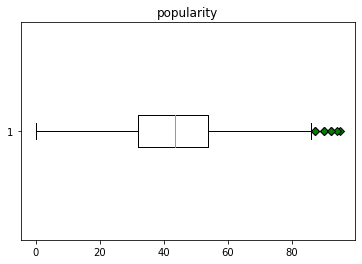

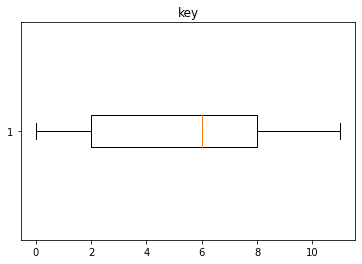

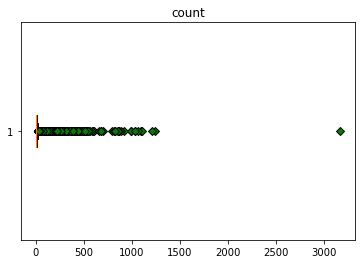

In [13]:
lst=['acousticness','danceability','duration_ms','energy','liveness','loudness','speechiness','tempo','valence','popularity','key','count']
for a in range(1,12):
    green_diamond = dict(markerfacecolor='g', marker='D')
    fig3, ax3 = plt.subplots()
    ax3.set_title(lst[a])
    ax3.boxplot(data[lst[a]], flierprops=green_diamond, vert=False)

**It can be noticed that speechiness has many outliers. Rap songs have a speechiness 0.1 Therefore any songs with a high value of speechiness would most probably mean that it is a speech with background music that is mislabelled as "song/music" on Youtube. Such outliers must be removed by dropping**

In [14]:
out_thresh = data['speechiness'].quantile(q=0.75) + 1.51 * data['speechiness'].quantile(q=0.25)
data[data['speechiness'] > out_thresh]['speechiness'].count()

3024

In [15]:
#value of upper limit. values higher than this will be removed
out_thresh

0.154902545

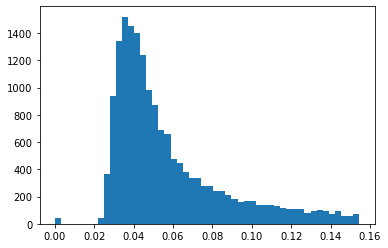

In [16]:
data.drop(data[data['speechiness'] > out_thresh].index, inplace=True)
f, e, plot = plt.hist(data['speechiness'], 50)

#### Now we can take another look at the columns of our data after having dealt with outliers and unecessary columns

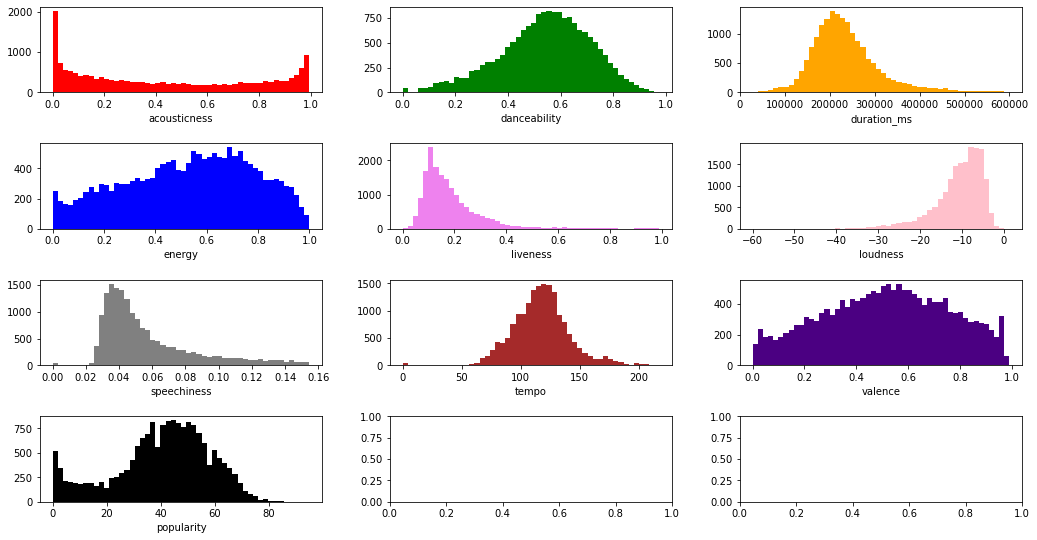

In [17]:
fig, axs = plt.subplots(4, 3, figsize=(15, 8))
fig.tight_layout(pad=3.0)
axs = axs.reshape(12,)
i = 0
colors = ['red', 'green', 'orange', 'blue','violet','pink','grey','brown','indigo','black']
for feature in data.columns:
    subplot = axs[i]
    if(data[feature].dtype=='float64'):
        subplot.set(xlabel=feature)
        f, edge, plot = subplot.hist(data[feature], 50, color=colors[i])
        i = i+1;

#### Violin Plots

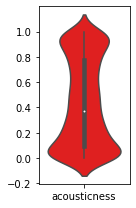

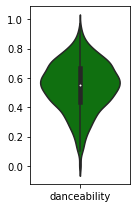

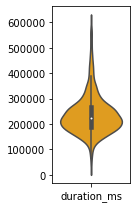

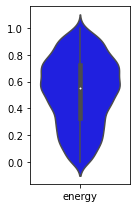

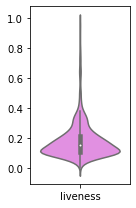

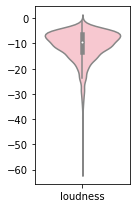

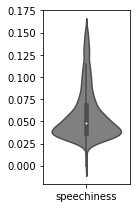

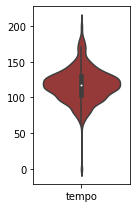

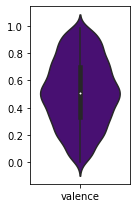

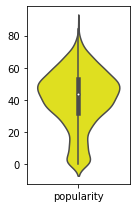

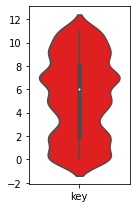

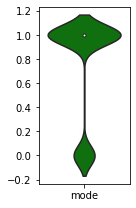

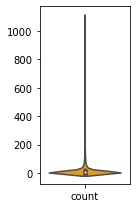

In [18]:
i=0
colors = ['red', 'green', 'orange', 'blue','violet','pink','grey','brown','indigo','yellow']
for a in range(1,14):
    plt.figure(figsize=(2,3))
    sns.violinplot( data=data.iloc[:3000, [a]],color=colors[i%10])
    plt.tight_layout()
    i+=1

In [19]:
data['count'].max()

3172

**From the violin plot we can infer that count is heavily skewed and values greater than 100 are extremely rare. The possible reason for high counts is the fact that the original dataset is biased and includes a large number of songs of particular artists.**


But the column counts does not represent anything significant and cannot be used for any analysis. This columns will be dropped later.

In [21]:
# SAVING THE NEW DATASET
data.to_csv('data_no_outliers.csv', index=False)